## Import necessary Libraries

In [137]:
import pandas as pd
import numpy as np
import seaborn as sns
import scipy as sp
import matplotlib.pyplot as plt

## read data

In [139]:
df = pd.read_csv(r'C:\Users\HP\Downloads\Data Sceince_tutorial\Exit Test\customer_churn.csv')

# Step 3: Undestanding the data

In [141]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0.0,Yes,No,1.0,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0.0,No,No,34.0,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0.0,No,No,2.0,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0.0,No,No,45.0,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0.0,No,No,2.0,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7036 non-null   float64
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7030 non-null   float64
 6   PhoneService      7030 non-null   object 
 7   MultipleLines     7030 non-null   object 
 8   InternetService   7006 non-null   object 
 9   OnlineSecurity    7028 non-null   object 
 10  OnlineBackup      7028 non-null   object 
 11  DeviceProtection  7028 non-null   object 
 12  TechSupport       7028 non-null   object 
 13  StreamingTV       7021 non-null   object 
 14  StreamingMovies   7029 non-null   object 
 15  Contract          7018 non-null   object 
 16  PaperlessBilling  7029 non-null   object 


In [143]:
df.describe()

,SeniorCitizen,tenure,MonthlyCharges
count,7036.000000,7030.000000,7027.000000
mean,0.162024,32.367568,64.757855
std,0.368499,24.560644,30.091845
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.500000
50%,0.000000,29.000000,70.350000
75%,0.000000,55.000000,89.850000
max,1.000000,72.000000,118.750000


In [145]:
df.shape

(7043, 21)

In [147]:
df.isna().sum()

customerID           0
gender               0
SeniorCitizen        7
Partner              0
Dependents           0
tenure              13
PhoneService        13
MultipleLines       13
InternetService     37
OnlineSecurity      15
OnlineBackup        15
DeviceProtection    15
TechSupport         15
StreamingTV         22
StreamingMovies     14
Contract            25
PaperlessBilling    14
PaymentMethod        1
MonthlyCharges      16
TotalCharges         7
Churn                0
dtype: int64

In [149]:
df.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

# Step 4:Preprocessing #Handling missing values

# Display histograms for all numerical columns in the DataFrame

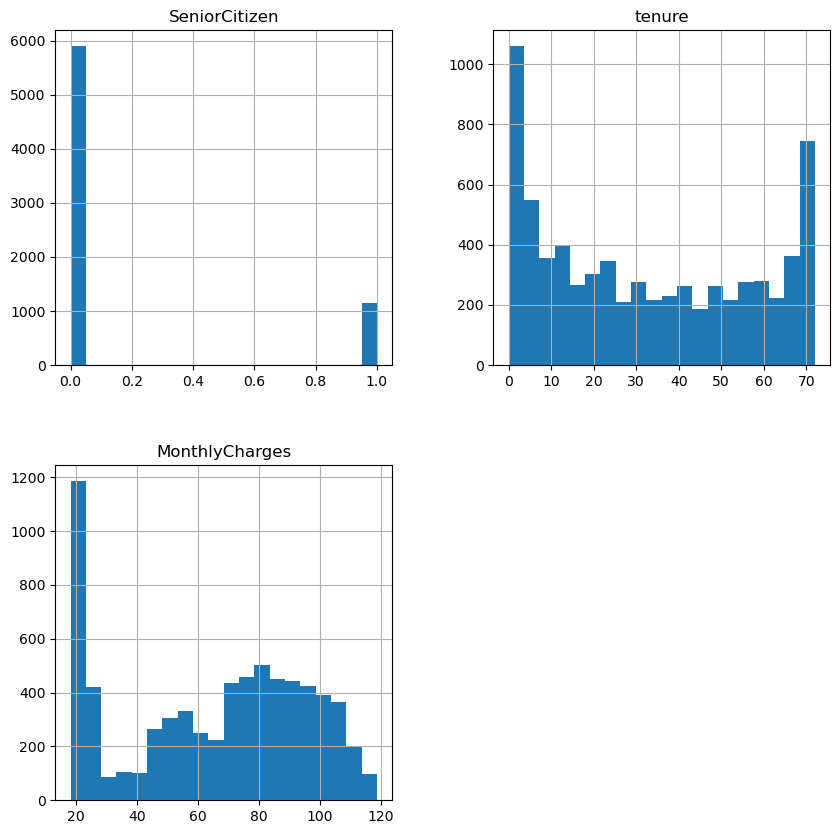

In [151]:
df.hist(bins=20, figsize=(10, 10))
plt.show()

# Calculate the percentage distribution of the 'Churn' column

In [153]:
(df['Churn'].value_counts(normalize=True)*100)

Churn
No     73.463013
Yes    26.536987
Name: proportion, dtype: float64

# data is skewed, hence replacing numerical with median and categorical columns with mode

In [155]:
df['SeniorCitizen'].fillna(df['SeniorCitizen'].median(), inplace=True)
df['tenure'].fillna(df['tenure'].median(), inplace=True)
df['MonthlyCharges'].fillna(df['MonthlyCharges'].median(), inplace=True)

C:\Users\HP\AppData\Local\Temp\ipykernel_25632\4294939844.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['SeniorCitizen'].fillna(df['SeniorCitizen'].median(), inplace=True)
C:\Users\HP\AppData\Local\Temp\ipykernel_25632\4294939844.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as 

In [157]:
df.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

In [159]:
df['InternetService'].fillna(df['InternetService'].mode()[0], inplace=True)
df['PhoneService'].fillna(df['PhoneService'].mode()[0], inplace=True)
df['MultipleLines'].fillna(df['MultipleLines'].mode()[0], inplace=True)
df['OnlineSecurity'].fillna(df['OnlineSecurity'].mode()[0], inplace=True)
df['OnlineBackup'].fillna(df['OnlineBackup'].mode()[0], inplace=True)
df['DeviceProtection'].fillna(df['DeviceProtection'].mode()[0], inplace=True)
df['TechSupport'].fillna(df['TechSupport'].mode()[0], inplace=True)
df['StreamingTV'].fillna(df['StreamingTV'].mode()[0], inplace=True)
df['StreamingMovies'].fillna(df['StreamingMovies'].mode()[0], inplace=True)
df['Contract'].fillna(df['Contract'].mode()[0], inplace=True)
df['PaperlessBilling'].fillna(df['PaperlessBilling'].mode()[0], inplace=True)
df['PaymentMethod'].fillna(df['PaymentMethod'].mode()[0], inplace=True)
df['TotalCharges'].fillna(df['TotalCharges'].mode()[0], inplace=True)

C:\Users\HP\AppData\Local\Temp\ipykernel_25632\3890418996.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['InternetService'].fillna(df['InternetService'].mode()[0], inplace=True)
C:\Users\HP\AppData\Local\Temp\ipykernel_25632\3890418996.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behave

In [161]:
df.isna().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

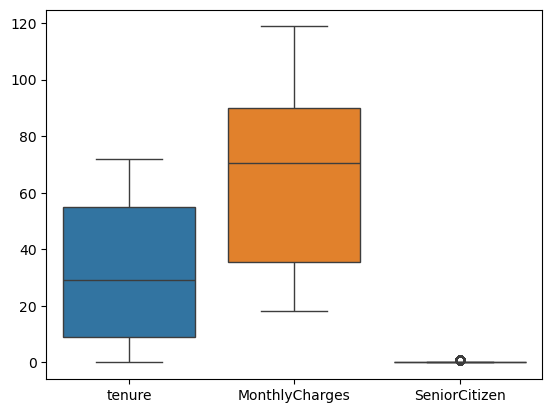

<Figure size 1200x800 with 0 Axes>

In [163]:
sns.boxplot(data=df[['tenure', 'MonthlyCharges', 'SeniorCitizen']])
plt.figure(figsize=(12,8))
plt.show()

In [165]:
# define y and X
y = df['Churn']
X = df.drop(['customerID','Churn'],axis=1)

In [167]:
y.value_counts()

Churn
No     5174
Yes    1869
Name: count, dtype: int64

In [169]:
# To balance data
from imblearn.over_sampling import RandomOverSampler

In [171]:
ros = RandomOverSampler()

In [173]:
X,y = ros.fit_resample(X,y)

In [175]:
y.value_counts()

Churn
No     5174
Yes    5174
Name: count, dtype: int64

## Label Encoding for targetcolumn'

In [193]:
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()

In [195]:
y = label_encoder.fit_transform(y)

In [197]:
y

array([0, 0, 1, ..., 1, 1, 1])

# encoding of categorical columns

In [283]:
# ordinal encoding
from sklearn.preprocessing import OrdinalEncoder

In [285]:
oe = OrdinalEncoder()

In [289]:
X = oe.fit_transform(X)

In [291]:
# To train test split
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,random_state=2529)

In [305]:
#  To select mode
from sklearn.ensemble import RandomForestClassifier

In [307]:
rfc = RandomForestClassifier()

In [309]:
# train model
rfc.fit(X_train,y_train)

RandomForestClassifier()

In [311]:
# To predict model
y_pred = rfc.predict(X_test)

In [313]:
# Confusion Matrix-to evaluate the performance of classification models
from sklearn.metrics import confusion_matrix
print(confusion_matrix(y_test, y_pred))


[[1165  121]
 [ 239  236]]


In [315]:
# To evaluate
from sklearn.metrics import classification_report


In [317]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.83      0.91      0.87      1286
           1       0.66      0.50      0.57       475

    accuracy                           0.80      1761
   macro avg       0.75      0.70      0.72      1761
weighted avg       0.78      0.80      0.79      1761



## Logistic regression

In [319]:
from sklearn.linear_model import LogisticRegression
lr_model = LogisticRegression()
lr_model.fit(X_train,y_train)
accuracy_lr = lr_model.score(X_test,y_test)
print("Logistic Regression accuracy is :",accuracy_lr)

Logistic Regression accuracy is : 0.8018171493469619


C:\Users\HP\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [255]:
from sklearn.neighbors import KNeighborsClassifier
knn_model = KNeighborsClassifier(n_neighbors = 11) 
knn_model.fit(x_train,y_train)
predicted_y = knn_model.predict(x_test)
accuracy_knn = knn_model.score(x_test,y_test)
print("KNN accuracy:",accuracy_knn)

ValueError: could not convert string to float: '4906-ZHGPK'